In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df=pd.read_csv('train.csv')

In [5]:
df.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [9]:
df_encoded = pd.get_dummies(df, columns=["EJ"], prefix="EJ")

# Display the updated DataFrame
print(df_encoded.head())

             Id        AB          AF          AH         AM        AR  \
0  000ff2bfdfe9  0.209377  3109.03329   85.200147  22.394407  8.138688   
1  007255e47698  0.145282   978.76416   85.200147  36.968889  8.138688   
2  013f2bd269f5  0.470030  2635.10654   85.200147  32.360553  8.138688   
3  043ac50845d5  0.252107  3819.65177  120.201618  77.112203  8.138688   
4  044fb8a146ec  0.380297  3733.04844   85.200147  14.103738  8.138688   

         AX        AY         AZ          BC  ...        FS         GB  \
0  0.699861  0.025578   9.812214    5.555634  ...  0.094822  11.339138   
1  3.632190  0.025578  13.517790    1.229900  ...  0.568932   9.292698   
2  6.732840  0.025578  12.824570    1.229900  ...  1.198821  37.077772   
3  3.685344  0.025578  11.053708    1.229900  ...  0.284466  18.529584   
4  3.942255  0.054810   3.396778  102.151980  ...  0.121914  16.408728   

           GE            GF         GH         GI         GL  Class   EJ_A  \
0   72.611063   2003.810319  22.

In [11]:
df.isnull().sum()

Id        0
AB        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ       60
BR        0
BZ        0
CB        2
CC        3
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        1
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EJ        0
EL       60
EP        0
EU        0
FC        1
FD        0
FE        0
FI        0
FL        1
FR        0
FS        2
GB        0
GE        0
GF        0
GH        0
GI        0
GL        1
Class     0
dtype: int64

In [13]:
df=df.dropna()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      548 non-null    object 
 1   AB      548 non-null    float64
 2   AF      548 non-null    float64
 3   AH      548 non-null    float64
 4   AM      548 non-null    float64
 5   AR      548 non-null    float64
 6   AX      548 non-null    float64
 7   AY      548 non-null    float64
 8   AZ      548 non-null    float64
 9   BC      548 non-null    float64
 10  BD      548 non-null    float64
 11  BN      548 non-null    float64
 12  BP      548 non-null    float64
 13  BQ      548 non-null    float64
 14  BR      548 non-null    float64
 15  BZ      548 non-null    float64
 16  CB      548 non-null    float64
 17  CC      548 non-null    float64
 18  CD      548 non-null    float64
 19  CF      548 non-null    float64
 20  CH      548 non-null    float64
 21  CL      548 non-null    float64
 22  CR     

In [15]:
df.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,...,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.462860,3502.844518,118.817523,37.971167,10.196422,5.379830,0.062971,10.828981,8.718112,5382.822970,...,4.604619,3.746416,0.423671,20.552888,132.944954,15973.953703,31.364689,52.767917,9.448235,0.186131
std,0.395050,2281.427013,134.529098,68.540076,10.898788,2.506650,0.442135,4.408974,69.114063,3165.156480,...,9.095599,53.199582,1.376450,10.072061,151.520840,20083.928101,9.879365,37.285570,10.476576,0.389568
min,0.085460,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.874248,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.246766,2198.933605,85.200147,12.030297,8.138688,4.066281,0.025578,8.532908,1.229900,4161.104110,...,0.173229,0.552957,0.067730,14.020440,72.611063,3247.748035,25.033958,23.279172,0.150069,0.000000
50%,0.341840,3090.383560,85.200147,20.135146,8.138688,4.947752,0.025578,10.681890,1.229900,4992.779215,...,2.151784,1.157970,0.250601,18.650510,72.611063,8762.168480,30.519642,43.785085,0.594000,0.000000
75%,0.552285,4367.771182,107.739039,37.083478,8.138688,6.183582,0.037910,13.185360,5.390476,6020.698707,...,6.050474,1.506550,0.523214,25.064239,125.135266,21747.642820,36.822086,70.791728,21.978000,0.000000
max,4.435374,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


<Axes: ylabel='count'>

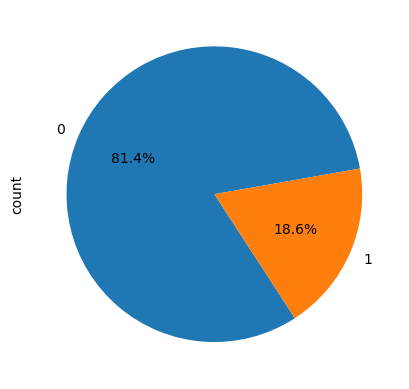

In [17]:
dist_df=df.Class.value_counts()
dist_df.plot(kind='pie', autopct='%1.1f%%', startangle=10)

In [19]:
final_df = pd.get_dummies(df, columns=["EJ"], drop_first=True)

In [21]:
final_df["EJ_B"] = final_df["EJ_B"].astype(int)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      548 non-null    object 
 1   AB      548 non-null    float64
 2   AF      548 non-null    float64
 3   AH      548 non-null    float64
 4   AM      548 non-null    float64
 5   AR      548 non-null    float64
 6   AX      548 non-null    float64
 7   AY      548 non-null    float64
 8   AZ      548 non-null    float64
 9   BC      548 non-null    float64
 10  BD      548 non-null    float64
 11  BN      548 non-null    float64
 12  BP      548 non-null    float64
 13  BQ      548 non-null    float64
 14  BR      548 non-null    float64
 15  BZ      548 non-null    float64
 16  CB      548 non-null    float64
 17  CC      548 non-null    float64
 18  CD      548 non-null    float64
 19  CF      548 non-null    float64
 20  CH      548 non-null    float64
 21  CL      548 non-null    float64
 22  CR     

In [23]:
print(final_df["EJ_B"].head())

0    1
1    0
2    1
3    1
4    1
Name: EJ_B, dtype: int32


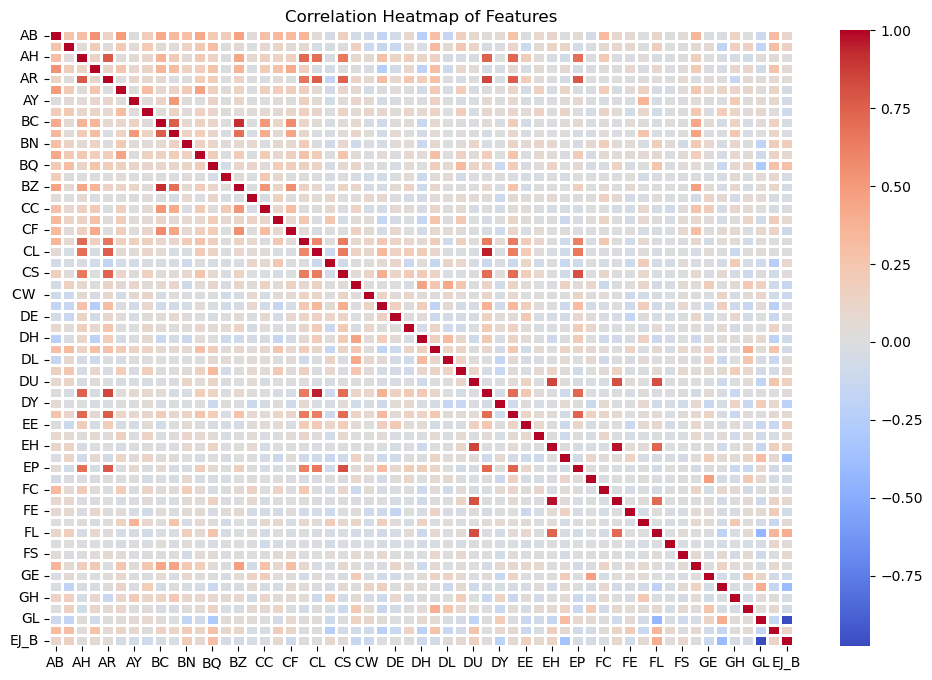

In [25]:
corr_df=final_df
corr_df=corr_df.drop(columns=["Id"])
corr_matrix=corr_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", linewidths=0.8)
plt.title("Correlation Heatmap of Features")
plt.show()

In [27]:
print(corr_matrix)

             AB        AF        AH        AM        AR        AX        AY  \
AB     1.000000  0.256934  0.297112  0.540094  0.130587  0.495659  0.017091   
AF     0.256934  1.000000  0.041656  0.186225  0.036253  0.217370  0.042965   
AH     0.297112  0.041656  1.000000  0.138657  0.770954  0.029227  0.055315   
AM     0.540094  0.186225  0.138657  1.000000  0.123677  0.248486  0.089897   
AR     0.130587  0.036253  0.770954  0.123677  1.000000  0.018392  0.101825   
AX     0.495659  0.217370  0.029227  0.248486  0.018392  1.000000  0.022299   
AY     0.017091  0.042965  0.055315  0.089897  0.101825  0.022299  1.000000   
AZ     0.182103  0.217198  0.097921  0.134395  0.084399  0.308656  0.036766   
BC     0.418446  0.062178  0.370304  0.357050  0.074751  0.092115  0.132073   
BD     0.341972  0.037224  0.214441  0.307939 -0.004463  0.137142  0.513457   
BN     0.291792  0.138549  0.058772  0.140763  0.022676  0.204750  0.040186   
BP     0.430603  0.220165  0.224477  0.196713  0.189

In [29]:
target_corr = corr_matrix["Class"].drop("Class").sort_values(ascending=False)
top_corr_features = target_corr[abs(target_corr) > 0.25].index.tolist() 

print("Top Features Correlated with Class:")
print(target_corr[abs(target_corr) > 0.25])

Top Features Correlated with Class:
FL    0.354990
AB    0.314508
AF    0.303462
BQ    0.277990
DI    0.270685
AM    0.268097
DU    0.254865
Name: Class, dtype: float64


In [31]:
print(target_corr)

FL      0.354990
AB      0.314508
AF      0.303462
BQ      0.277990
DI      0.270685
AM      0.268097
DU      0.254865
FE      0.201661
CD      0.187608
BN      0.183874
EH      0.178928
BC      0.158355
BP      0.132845
EJ_B    0.131734
FD      0.131402
DF      0.129354
AX      0.123347
CF      0.120564
BD      0.113988
BZ      0.112470
FR      0.102465
BR      0.091121
AY      0.084060
DY      0.082239
GB      0.078465
EB      0.072178
EL      0.069849
AR      0.069562
GI      0.069248
AH      0.048066
FC      0.028598
GH      0.028337
AZ      0.021859
CL      0.012461
DV      0.009995
CH     -0.000639
FS     -0.003750
CB     -0.027110
EG     -0.033417
CC     -0.039881
EU     -0.044845
DN     -0.065496
CS     -0.069307
GE     -0.074133
EP     -0.077650
CW     -0.085590
CU     -0.088070
FI     -0.119872
EE     -0.122648
DE     -0.122818
DL     -0.134271
GF     -0.153170
GL     -0.158048
DH     -0.201325
DA     -0.227663
CR     -0.242360
Name: Class, dtype: float64


Text(0.5, 1.0, 'Distribution of FL by Class')

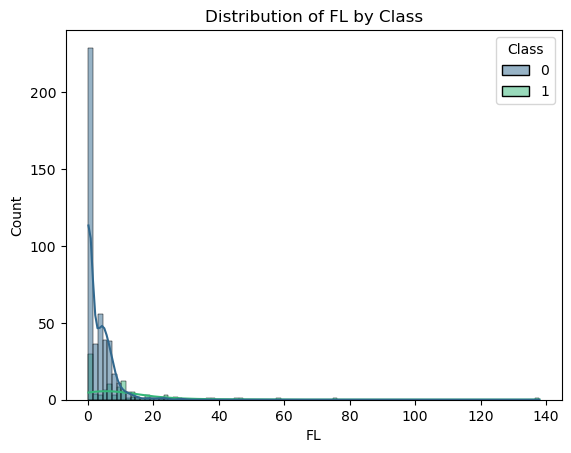

In [33]:
# Example code for FL histogram
sns.histplot(data=df, x='FL', hue='Class', kde=True, palette='viridis')
plt.title("Distribution of FL by Class")

Text(0.5, 1.0, 'FL vs. AB (Colored by Class)')

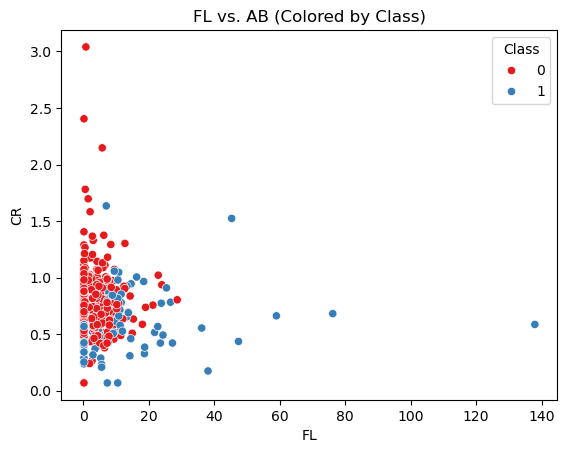

In [35]:
sns.scatterplot(data=df, x='FL', y='CR', hue='Class', palette='Set1')
plt.title("FL vs. AB (Colored by Class)")

In [37]:
X = final_df.drop(columns=["Id","Class"])
y=final_df["Class"]

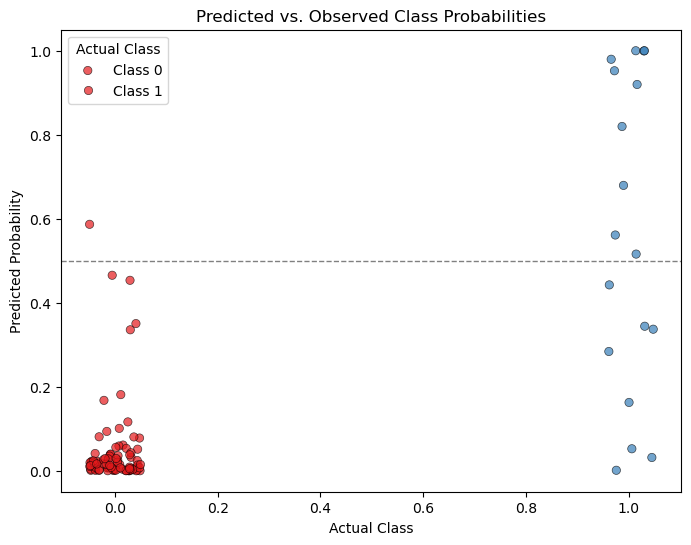

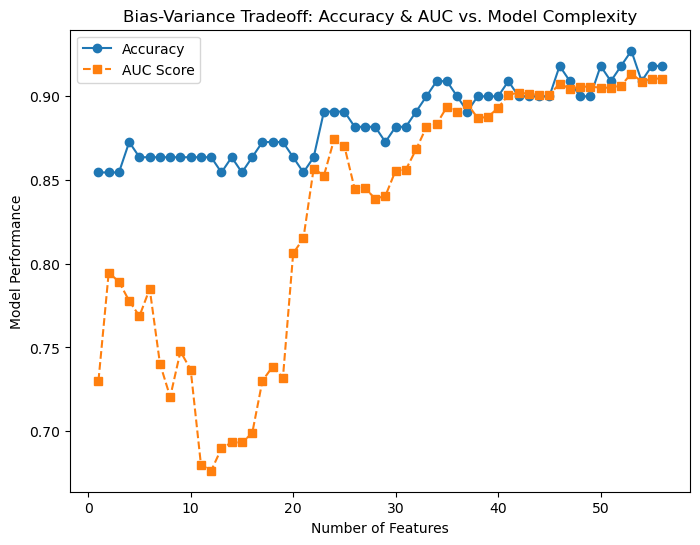

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Standardizing the features (fit only on training data, transform both train & test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame with feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Lists to store results
num_list_features = []
accuracy_list = []
auc_list = []
selected_features_list = []  # Store feature names

# Iteratively fit logistic regression models with increasing number of features
for i in range(1, len(X_train.columns) + 1):
    selected_features = X_train.columns[:i]
    
    # Training logistic regression model using saga solver
    model = LogisticRegression(max_iter=5000, solver='saga')  
    model.fit(X_train_scaled[selected_features], y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled[selected_features])
    y_prob = model.predict_proba(X_test_scaled[selected_features])[:, 1]
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    # Append results
    num_list_features.append(i)
    accuracy_list.append(accuracy)
    auc_list.append(auc)
    selected_features_list.append(list(selected_features))  # Store the feature set used

# Store results in a DataFrame
performance_df = pd.DataFrame({
    "Num_Features": num_list_features,
    "Feature_Names": selected_features_list,
    "Accuracy": accuracy_list,
    "AUC_Score": auc_list
})


# Create a DataFrame to store actual and predicted values
results_df = pd.DataFrame({"Actual": y_test, "Predicted_Prob": model.predict_proba(X_test_scaled[selected_features])[:, 1]})

# Add jitter to the actual class values for better visualization
results_df["Actual_Jittered"] = results_df["Actual"] + np.random.uniform(-0.05, 0.05, size=len(y_test))

# Scatter plot with color differentiation
plt.figure(figsize=(8, 6))
sns.scatterplot(data=results_df, x="Actual_Jittered", y="Predicted_Prob", hue="Actual", palette="Set1", alpha=0.7, edgecolor="black")

# Add reference line (ideal predictions)
plt.axhline(0.5, color='gray', linestyle='--', linewidth=1)  # Decision threshold
plt.xlabel("Actual Class")
plt.ylabel("Predicted Probability")
plt.title("Predicted vs. Observed Class Probabilities")
plt.legend(title="Actual Class", labels=["Class 0", "Class 1"])
plt.show()

# Plot Accuracy vs. Model Complexity
plt.figure(figsize=(8, 6))
plt.plot(num_list_features, accuracy_list, marker='o', label="Accuracy")
plt.plot(num_list_features, auc_list, marker='s', label="AUC Score", linestyle="dashed")
plt.xlabel("Number of Features")
plt.ylabel("Model Performance")
plt.title("Bias-Variance Tradeoff: Accuracy & AUC vs. Model Complexity")
plt.legend()
plt.show()

In [40]:
performance_df

,Num_Features,Feature_Names,Accuracy,AUC_Score
0,1,[AB],0.854545,0.730072
1,2,"[AB, AF]",0.854545,0.794686
2,3,"[AB, AF, AH]",0.854545,0.789251
3,4,"[AB, AF, AH, AM]",0.872727,0.777778
4,5,"[AB, AF, AH, AM, AR]",0.863636,0.768720
5,6,"[AB, AF, AH, AM, AR, AX]",0.863636,0.785024
6,7,"[AB, AF, AH, AM, AR, AX, AY]",0.863636,0.740338
7,8,"[AB, AF, AH, AM, AR, AX, AY, AZ]",0.863636,0.720411
8,9,"[AB, AF, AH, AM, AR, AX, AY, AZ, BC]",0.863636,0.747585
9,10,"[AB, AF, AH, AM, AR, AX, AY, AZ, BC, BD ]",0.863636,0.736715


In [41]:
print(final_df["EJ_B"])

0      1
1      0
2      1
3      1
4      1
      ..
611    0
612    0
613    1
614    0
616    0
Name: EJ_B, Length: 548, dtype: int32


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21160\389340561.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.index, y=top_features.values, palette="coolwarm")


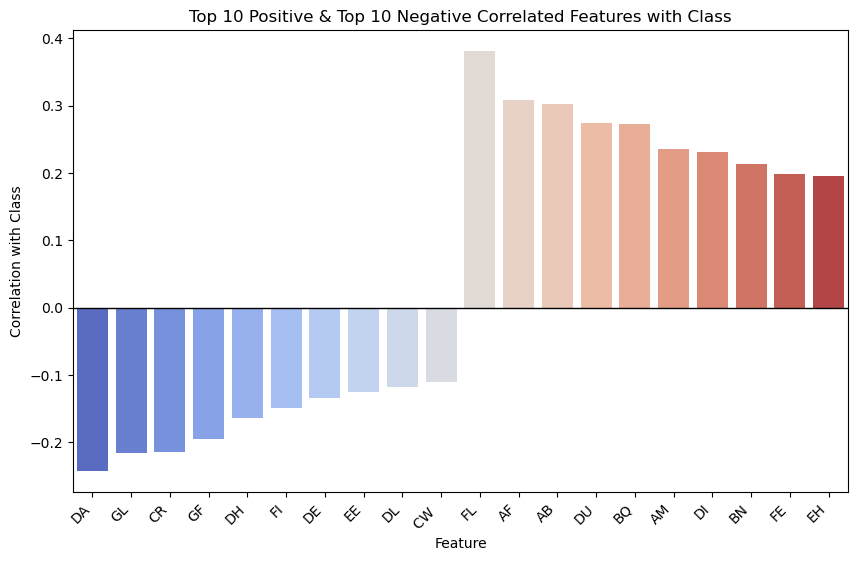

In [42]:
correlation = X_train.corrwith(y_train)

# Get the top 10 positive and top 10 negative correlated features
top_10_positive = correlation.nlargest(10)
top_10_negative = correlation.nsmallest(10)

# Combine them into a single DataFrame
top_features = pd.concat([top_10_negative, top_10_positive])

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.index, y=top_features.values, palette="coolwarm")

# Customize the plot
plt.axhline(0, color='black', linewidth=1)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Feature")
plt.ylabel("Correlation with Class")
plt.title("Top 10 Positive & Top 10 Negative Correlated Features with Class")
plt.show()

Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Optimized Random Forest Validation Accuracy: 0.9634
Optimized Random Forest Test Accuracy: 0.8675


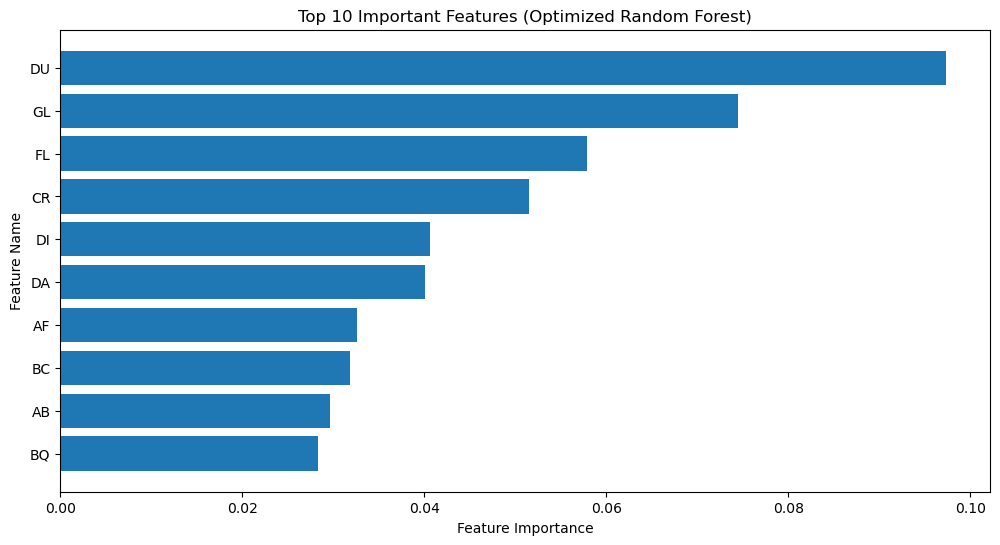

In [57]:
# Stratified split into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Define parameter grid for Random Forest
grid_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10,15],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=grid_params, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model from GridSearchCV
best_rf_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# Evaluate best model on validation set
y_pred = best_rf_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Optimized Random Forest Validation Accuracy: {accuracy:.4f}")

# Evaluate model on test set
y_test_pred = best_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Optimized Random Forest Test Accuracy: {test_accuracy:.4f}")

# Feature importance analysis
feature_importance = best_rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = X_train.columns[sorted_idx]
sorted_importance = feature_importance[sorted_idx]

plt.figure(figsize=(12, 6))
plt.barh(sorted_features[:10], sorted_importance[:10])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Top 10 Important Features (Optimized Random Forest)")
plt.gca().invert_yaxis()
plt.show()



Best Parameters Found: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}

================== Model Performance ==================
🔹 KNN Training Accuracy  : 0.9041
🔹 KNN Validation Accuracy: 0.8909
🔹 KNN Test Accuracy      : 0.8727

🔹 Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        45
           1       1.00      0.30      0.46        10

    accuracy                           0.87        55
   macro avg       0.93      0.65      0.69        55
weighted avg       0.89      0.87      0.84        55



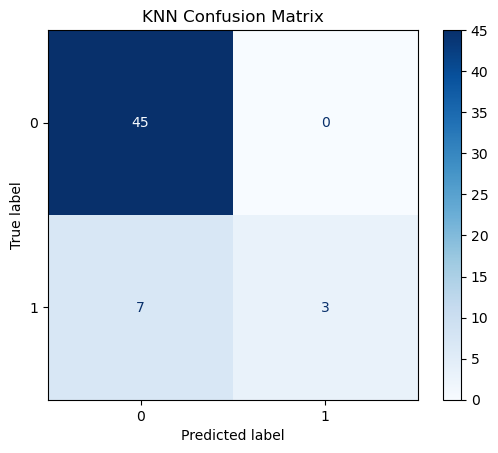

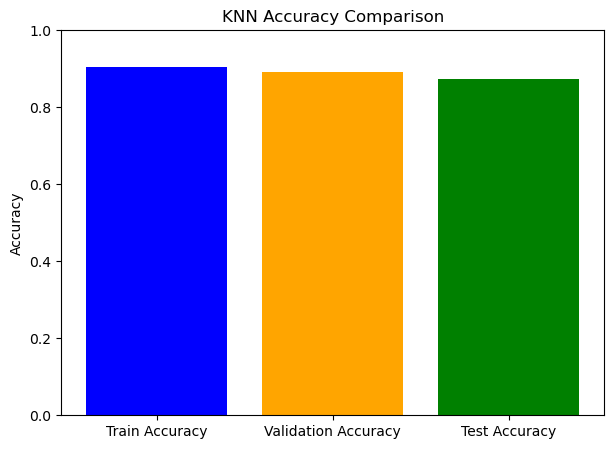

In [384]:
# Stratified split into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Normalize the features (important for KNN!)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_neighbors': [5, 7, 9, 11,13],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Voting strategy
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
knn_model = grid_search.best_estimator_
print(f"\nBest Parameters Found: {grid_search.best_params_}")

# Train KNN Classifier with best parameters
knn_model.fit(X_train, y_train)

# Make predictions
y_train_pred = knn_model.predict(X_train)
y_val_pred = knn_model.predict(X_val)
y_test_pred = knn_model.predict(X_test)

# Evaluate model performance
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("\n================== Model Performance ==================")
print(f"🔹 KNN Training Accuracy  : {train_accuracy:.4f}")
print(f"🔹 KNN Validation Accuracy: {val_accuracy:.4f}")
print(f"🔹 KNN Test Accuracy      : {test_accuracy:.4f}")
print("======================================================\n")

# Display Classification Report
print("🔹 Classification Report (Test Set):\n")
print(classification_report(y_test, y_test_pred))

# Plot Confusion Matrix
ConfusionMatrixDisplay.from_estimator(knn_model, X_test, y_test, cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

# Track accuracy trends over time
accuracy_values = [train_accuracy, val_accuracy, test_accuracy]
labels = ['Train Accuracy', 'Validation Accuracy', 'Test Accuracy']

plt.figure(figsize=(7, 5))
plt.bar(labels, accuracy_values, color=['blue', 'orange', 'green'])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("KNN Accuracy Comparison")
plt.show()


Optimal number of PCA components to retain 95% variance: 40


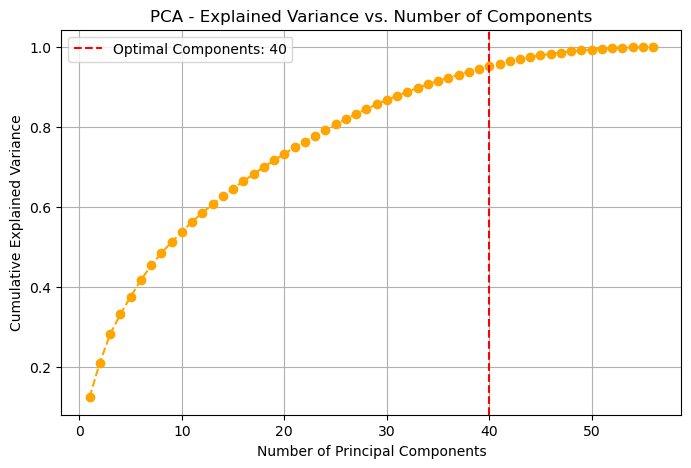

In [77]:

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to determine the number of components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Compute cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the optimal number of components (95% variance threshold)
optimal_components = np.argmax(explained_variance >= 0.95) + 1

print(f"Optimal number of PCA components to retain 95% variance: {optimal_components}")

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='orange')
plt.axvline(optimal_components, color='r', linestyle='--', label=f"Optimal Components: {optimal_components}")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance vs. Number of Components")
plt.legend()
plt.grid()
plt.show()


Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Optimized Random Forest Train Accuracy: 0.9634
Optimized Random Forest Test Accuracy: 0.8675


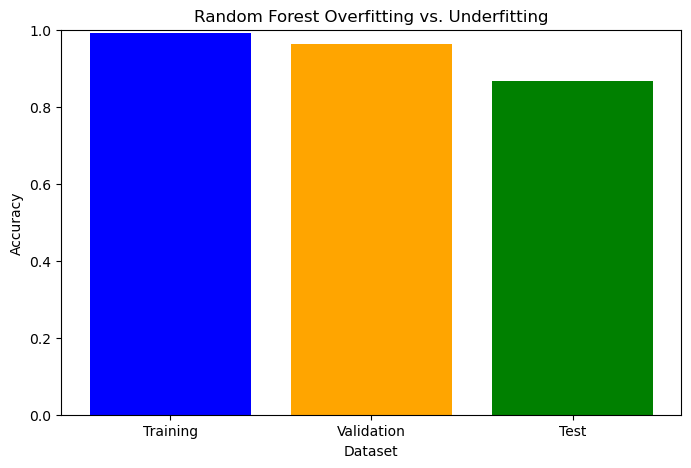

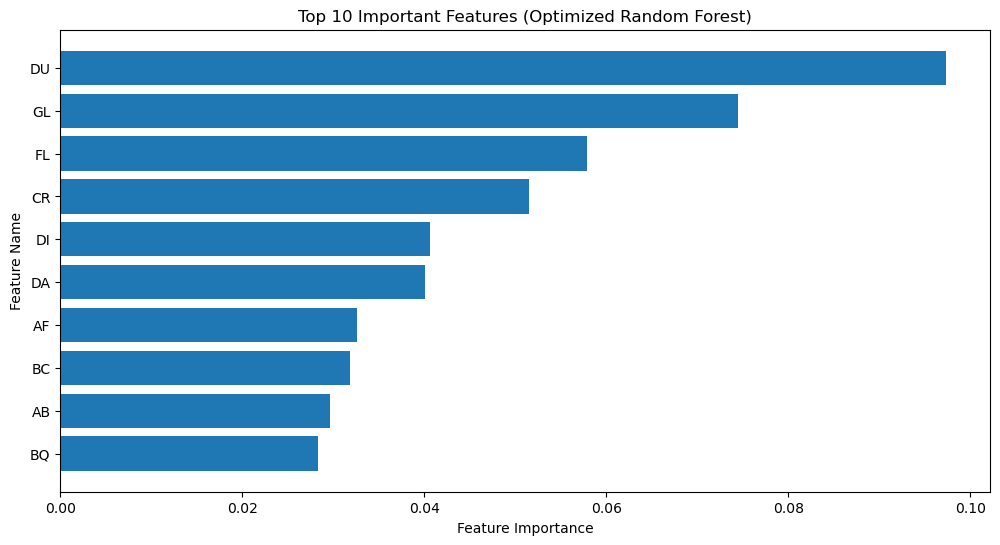

In [94]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Define parameter grid for Random Forest
grid_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=grid_params, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model from GridSearchCV
best_rf_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# Evaluate best model on training, validation, and test sets
y_train_pred = best_rf_model.predict(X_train)
y_val_pred = best_rf_model.predict(X_val)
y_test_pred = best_rf_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


print(f"Optimized Random Forest Train Accuracy: {val_accuracy:.4f}")
print(f"Optimized Random Forest Test Accuracy: {test_accuracy:.4f}")

# Plot accuracy to show overfitting vs. underfitting
plt.figure(figsize=(8, 5))
plt.bar(["Training", "Validation", "Test"], [train_accuracy, val_accuracy, test_accuracy], color=['blue', 'orange', 'green'])
plt.xlabel("Dataset")
plt.ylabel("Accuracy")
plt.title("Random Forest Overfitting vs. Underfitting")
plt.ylim(0, 1)
plt.show()

# Feature importance analysis
feature_importance = best_rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = X_train.columns[sorted_idx]
sorted_importance = feature_importance[sorted_idx]

plt.figure(figsize=(12, 6))
plt.barh(sorted_features[:10], sorted_importance[:10])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Top 10 Important Features (Optimized Random Forest)")
plt.gca().invert_yaxis()
plt.show()


In [91]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


#### DEEP Learning

In [93]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

Epoch 1/50


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/steptep - accuracy: 0.5157 - loss: 1.07
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5188 - loss: 1.0737 - val_accuracy: 0.7636 - val_loss: 1.1442 - learning_rate: 5.0000e-04
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/steptep - accuracy: 0.5656 - loss: 0.956
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5707 - loss: 0.9516 - val_accuracy: 0.7636 - val_loss: 1.0686 - learning_rate: 5.0000e-04
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/steptep - accuracy: 0.6813 - loss: 0.833
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6819 - loss: 0.8323 - val_accuracy: 0.7818 - val_loss: 1.0574 - learning_rate: 5.0000e-04
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/steptep - accuracy: 0.7290 - loss: 0.770
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7282 - loss: 0.7705 - val_accuracy: 0.8000 - val_loss: 0.8178 - learning_rate: 5.0000e-04
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/steptep - accuracy: 0.7991 - loss: 0.683
110/110

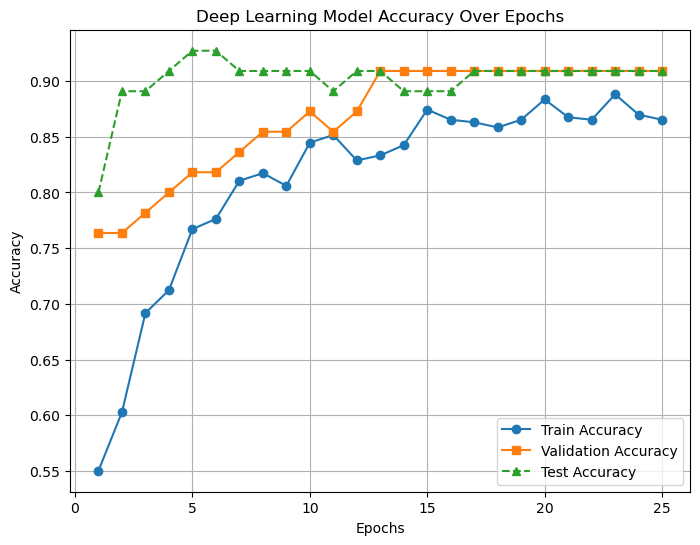

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("train.csv")

# Drop ID column and encode categorical features
df = df.drop(columns=["Id"])
df["EJ"] = df["EJ"].map({"A": 0, "B": 1})

# Drop rows with missing values
df = df.dropna()

# Separate features and target
X = df.drop(columns=["Class"])
y = df["Class"]

# Stratified split into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define Deep Learning Model
model = keras.Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.002), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(32, activation='relu', kernel_regularizer=l2(0.002)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(1, activation='sigmoid')  
])

# Compile the model
model.compile(optimizer=keras.optimizers.AdamW(learning_rate=0.0005, weight_decay=5e-4), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Callbacks
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_schedule = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Store test accuracy at each epoch
test_accuracies = []

# Custom callback to store test accuracy per epoch
class TestAccuracyCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        y_test_pred = (self.model.predict(X_test) > 0.5).astype(int)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_accuracies.append(test_accuracy)

# Train Model
history = model.fit(X_train, y_train, epochs=50, batch_size=4, validation_data=(X_val, y_val),
                    verbose=1, callbacks=[early_stopping, lr_schedule, TestAccuracyCallback()])

# Final Evaluation
y_train_pred = (model.predict(X_train) > 0.5).astype(int)
y_val_pred = (model.predict(X_val) > 0.5).astype(int)
y_test_pred = (model.predict(X_test) > 0.5).astype(int)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print Final Accuracy Results
print("\n================== Model Performance ==================")
print(f"🔹 Deep Learning Training Accuracy  : {train_accuracy:.4f}")
print(f"🔹 Deep Learning Validation Accuracy: {val_accuracy:.4f}")
print(f"🔹 Deep Learning Test Accuracy      : {test_accuracy:.4f}")
print("======================================================\n")

# Plot accuracy trends (including test accuracy)
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.plot(epochs, test_accuracies, label='Test Accuracy', marker='^', linestyle='dashed')  # Test Accuracy

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Deep Learning Model Accuracy Over Epochs")
plt.legend()
plt.grid()
plt.show()

Epoch 1/50


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5052 - loss: 1.4701 - val_accuracy: 0.2182 - val_loss: 1.6025 - learning_rate: 5.0000e-04
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5651 - loss: 1.3972 - val_accuracy: 0.2909 - val_loss: 1.6466 - learning_rate: 5.0000e-04
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5190 - loss: 1.3600 - val_accuracy: 0.3636 - val_loss: 1.7429 - learning_rate: 5.0000e-04
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5918 - loss: 1.1547 - val_accuracy: 0.4000 - val_loss: 1.6471 - learning_rate: 5.0000e-04
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6287 - loss: 1.1274 - val_accuracy: 0.5636 - val_loss: 1.6174 - learning_rate: 5.0000e-04
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6704 - loss: 1.0718 - val_accuracy: 0.7636 - val_loss: 1.5142 - learning_rate: 5.0000e-04
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6182 - lo


✅ Model saved to trained_model.h5
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

================== Model Performance ==================
🔹 Deep Learning Training Accuracy  : 0.8151
🔹 Deep Learning Validation Accuracy: 0.8545
🔹 Deep Learning Test Accuracy      : 0.8545



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  0%|          | 0/55 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 3s 782us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 3s 763us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 3s 728us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 3s 712us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 3s 792us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 3s 788us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 3s 741us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 3s 727us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 3s 735us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 3s 806us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━

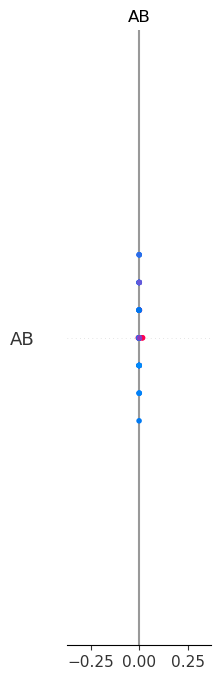

In [101]:
# Stratified split into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define Deep Learning Model
model = keras.Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(0.002), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.85),
    
    Dense(64, activation='relu', kernel_regularizer=l2(0.002)),
    BatchNormalization(),
    Dropout(0.70),
    
    Dense(32, activation='relu', kernel_regularizer=l2(0.002)),
    BatchNormalization(),
    Dropout(0.60),
    
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=keras.optimizers.AdamW(learning_rate=0.0005, weight_decay=5e-4), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Callbacks
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_schedule = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train Model
history = model.fit(X_train, y_train, epochs=50, batch_size=4, validation_data=(X_val, y_val),
                    verbose=1, callbacks=[early_stopping, lr_schedule])

# Save the trained model
model_path = "trained_model.h5"
model.save(model_path)
print(f"\n✅ Model saved to {model_path}")

# Evaluate Model
y_train_pred = (model.predict(X_train) > 0.5).astype(int)
y_val_pred = (model.predict(X_val) > 0.5).astype(int)
y_test_pred = (model.predict(X_test) > 0.5).astype(int)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("\n================== Model Performance ==================")
print(f"🔹 Deep Learning Training Accuracy  : {train_accuracy:.4f}")
print(f"🔹 Deep Learning Validation Accuracy: {val_accuracy:.4f}")
print(f"🔹 Deep Learning Test Accuracy      : {test_accuracy:.4f}")
print("======================================================\n")

# -------------------- SHAP FEATURE IMPORTANCE --------------------

# Load the saved model
loaded_model = tf.keras.models.load_model(model_path)

# Select a subset of data for SHAP explanation
X_sample = pd.DataFrame(X_test[:500], columns=X.columns)

# Use SHAP KernelExplainer
explainer = shap.KernelExplainer(loaded_model.predict, X_sample[:100])  # Smaller subset for efficiency
shap_values = explainer.shap_values(X_sample[:100])  # Compute SHAP values

# Plot SHAP summary with feature names
shap.summary_plot(shap_values, X_sample[:100], feature_names=X.columns)


<style>
    .output_scroll {
        overflow: visible !important;
        max-height: none !important;
    }
    </style>